In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# add quotes before and after <style>

### Load packages

In [1]:
import nltk
import datetime
import re
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml
from io import StringIO
from collections import Counter
from sklearn.decomposition import PCA
import pickle
import json
import os

import seaborn as sns
sns.set_style("darkgrid")
%pylab inline

#visualization
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [3]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from nltk.tag import pos_tag

from textblob import TextBlob


### Sentence Tokenize

In [5]:
bus_review_small = np.load('data/bus_review_small.pkl')

In [7]:
bus_review_small_mny = np.load('data/bus_review_small_mny.pkl')

In [9]:
bus_review_small2 = bus_review_small_mny.dropna().copy()

In [10]:
bus_review_small2.shape

(50000, 29)

In [11]:
bus_review_small_mny.iloc[:10,:]['review_txt']

348495    Meatballs in a cone. That is the reason we cam...
5872      Part of my new foodie escapades, my friends an...
47283     I love this place. It's always quiet and clean...
68825     DELICIOUS FOOD! WILL GO BACK FOR THE ALL YOU C...
230951    I love this location! Sometimes there can be a...
359482    I went with a friend and luckily we didn't hav...
345537    My absolute favorite place in Phoenix!!! The v...
220273    I was in the mood for Chinese buffet and thoug...
20791     Sorry I just don't understand the attraction t...
569829    We had lunch here on a Sunday and I'd describe...
Name: review_txt, dtype: object

In [12]:
def custom_tokenize(text):
    try:
        return sent_tokenize(text)
    except:
        return ''


In [13]:
bus_review_small2.shape

(50000, 29)

In [14]:
bus_review_small2['sent_token'] = bus_review_small2['review_txt'].apply(custom_tokenize) 

In [15]:
bus_review_small2.head()

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,date,funny,review_id,user_stars,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token
348495,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,2016-12-30,10.0,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c..."
5872,-YYe0kff9YAYzr5L09TT_A,7,ukAUNyzUcBA4Su8UKjaJKg,7 Numbers Restaurant,"[Restaurants, Italian]","{'RestaurantsTableService': True, 'GoodForMeal...",4.0,86,Toronto,ON,...,2015-09-06,0.0,m8ln3p3ZaPkr05JtJ6M0Ug,4,"Part of my new foodie escapades, my friends an...",0.0,2010-08-29,2015.0,1,"[Part of my new foodie escapades, my friends a..."
47283,31AAc5BMVM4tVCqlTJgE1w,6,yNBVOKSZN_AIjSJdhF_rqA,Garbanzo Mediterranean Grill,"[Caterers, American (Traditional), Falafel, Me...","{'Alcohol': 'none', 'HasTV': False, 'NoiseLeve...",3.5,122,Phoenix,AZ,...,2015-04-06,0.0,MW3Aa0xYLg9ZZzpsP-0ipQ,4,I love this place. It's always quiet and clean...,1.0,2013-09-23,99999.0,0,"[I love this place., It's always quiet and cle..."
68825,4wfyhqXWAeVPxmAk-dlneg,2,5C58ejb2nmJojUFPlvJj2A,Masa Sushi & Teppanyaki,"[Restaurants, Sushi Bars, Japanese]","{'RestaurantsTableService': True, 'GoodForMeal...",2.5,70,Toronto,ON,...,2012-03-06,0.0,H-lonjG5lZMl2a3EvfUftQ,4,DELICIOUS FOOD! WILL GO BACK FOR THE ALL YOU C...,0.0,2011-07-23,99999.0,0,"[DELICIOUS FOOD!, WILL GO BACK FOR THE ALL YOU..."
230951,Iv3-ijKAeAkioYLst-n9kg,15,QSCDR9RBTVyTw7p_Nbq1Xg,Einstein Bros Bagels,"[Restaurants, Delis, Food, Bagels, Breakfast &...","{'RestaurantsTableService': False, 'GoodForMea...",2.5,51,Phoenix,AZ,...,2014-06-18,0.0,uGt-XNof0vt7dHUvhblfuQ,4,I love this location! Sometimes there can be a...,0.0,2009-04-23,99999.0,0,"[I love this location!, Sometimes there can be..."


In [16]:
# Each row is a sentence
review_sent = pd.DataFrame(bus_review_small2.set_index(['review_id'])['sent_token'].apply(pd.Series).stack()).reset_index()

In [17]:
review_sent.head()

,review_id,level_1,0
0,LdvZmKFR4wk_fbP9dPiREw,0,Meatballs in a cone.
1,LdvZmKFR4wk_fbP9dPiREw,1,That is the reason we came.
2,LdvZmKFR4wk_fbP9dPiREw,2,"Nothing more, nothing less."
3,LdvZmKFR4wk_fbP9dPiREw,3,"A man, on a mission."
4,LdvZmKFR4wk_fbP9dPiREw,4,I walked in and the staff was lovely.


In [18]:
# review_sent[review_sent.isnull().any(axis=1)]

In [19]:
review_sent['sent_cnt'] = review_sent['review_id'].groupby(review_sent['review_id']).transform('count')
review_sent.drop('level_1', axis=1, inplace=True)

review_sent.columns = ['review_id', 'sentence', 'sent_cnt']


In [20]:
review_sent.shape

(427412, 3)

In [21]:
review_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427412 entries, 0 to 427411
Data columns (total 3 columns):
review_id    427412 non-null object
sentence     427412 non-null object
sent_cnt     427412 non-null int64
dtypes: int64(1), object(2)
memory usage: 9.8+ MB


In [22]:
review_sent.head()

,review_id,sentence,sent_cnt
0,LdvZmKFR4wk_fbP9dPiREw,Meatballs in a cone.,21
1,LdvZmKFR4wk_fbP9dPiREw,That is the reason we came.,21
2,LdvZmKFR4wk_fbP9dPiREw,"Nothing more, nothing less.",21
3,LdvZmKFR4wk_fbP9dPiREw,"A man, on a mission.",21
4,LdvZmKFR4wk_fbP9dPiREw,I walked in and the staff was lovely.,21


''

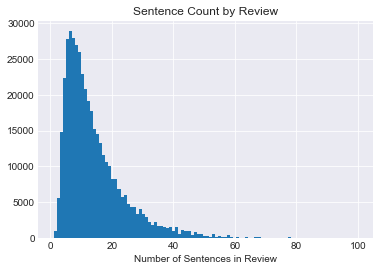

In [338]:
review_sent.sent_cnt.hist(bins=100)
plt.title("Sentence Count by Review")
plt.xlabel("Number of Sentences in Review")
;

In [340]:
review_sent.columns

Index(['review_id', 'sentence', 'sent_cnt'], dtype='object')

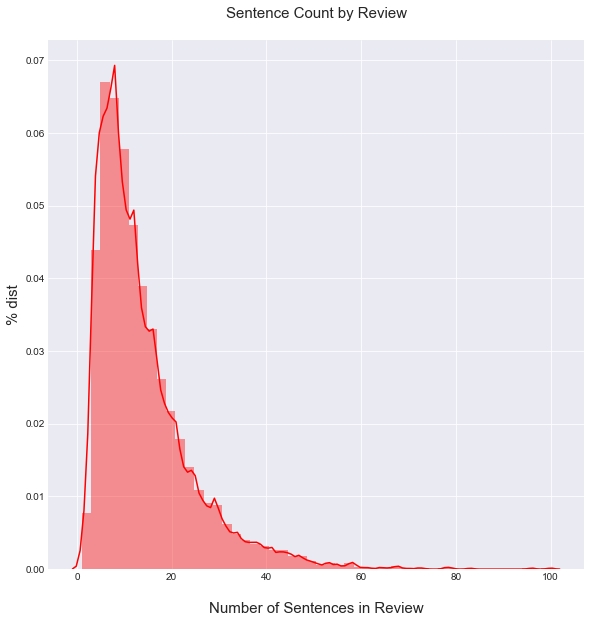

In [357]:
g = sns.FacetGrid(review_sent, size=(8))
g.map(sns.distplot, "sent_cnt", color='r')
plt.title("Sentence Count by Review\n", fontsize=15)
plt.xlabel("\nNumber of Sentences in Review", fontsize=15)
plt.ylabel("% dist", fontsize=15)
g.add_legend();

In [335]:
review_sent.sent_cnt.describe()

count    427412.000000
mean         13.900064
std          10.349888
min           1.000000
25%           7.000000
50%          11.000000
75%          18.000000
max         100.000000
Name: sent_cnt, dtype: float64

In [28]:
review_sent_mny_sent = review_sent[review_sent['sent_cnt'] >= 10]

In [29]:
# Merge back to original df
review_sent_merge_mny = pd.merge(bus_review_small2, review_sent_mny_sent, how='inner', left_on = 'review_id', right_on = 'review_id')


In [30]:
review_sent_merge_mny[review_sent_merge_mny.isnull().any(axis=1)]

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,review_id,user_stars,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt


In [31]:
review_sent_merge_mny.head(10)

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,review_id,user_stars,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt
0,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Meatballs in a cone.,21
1,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",That is the reason we came.,21
2,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","Nothing more, nothing less.",21
3,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","A man, on a mission.",21
4,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I walked in and the staff was lovely.,21
5,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",They said take your time and look around.,21
6,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","I told them, I know what I want.",21
7,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Our eyes lock and they knew what I was there f...,21
8,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Just kidding...,21
9,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,LdvZmKFR4wk_fbP9dPiREw,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I had to tell th

In [32]:
review_sent_merge_mny.shape

(246358, 32)

In [33]:
# prog = re.compile(pattern)
# result = prog.match(string)

In [34]:
# prog = re.compile('^([a-zA-Z]+|\W)$')

#### Tokenize

### Sentiment Analysis - sentence at a time

In [35]:
# bus_review_small['sent_token'] = bus_review_small['review_txt'].apply(custom_tokenize) 

def custom_sent_pol(text):
    try:
        return TextBlob(text).sentiment[0]
    except:
        return 0

In [36]:
# Sentence level sentiment
review_sent_merge_mny['polarity'] = review_sent_merge_mny['sentence'].apply(custom_sent_pol)


In [37]:
review_sent_merge_mny.shape

(246358, 33)

In [38]:
review_sent_merge_mny.head()

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,user_stars,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt,polarity
0,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Meatballs in a cone.,21,0.000000
1,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",That is the reason we came.,21,0.000000
2,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","Nothing more, nothing less.",21,0.166667
3,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","A man, on a mission.",21,0.000000
4,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,4,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I walked in and the staff was lovely.,21,0.500000


### Tokenize by sentence

In [39]:
def strip_proppers_POS(text):
    tagged = pos_tag(text) #use NLTK's part of speech tagger
    non_propernouns = [word for word, pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns
#     http://brandonrose.org/clustering_mobile

def tokenize_stem(df, col_name):
    '''
    Input dataframe.
    Output dataframe do stemming on a specific column
    '''
    # Tokenize
    df['token'] = df[col_name].apply(word_tokenize) 

    # Create stem words
    prog = re.compile('^([a-zA-Z]+|\W)$')
    
#     df['stemmed'] = df["token"].\
#         apply(lambda x: [stemmer.stem(y) for y in x if re.match('^([a-zA-Z]+|\W)$', y)])
    df['stemmed'] = df["token"].\
        apply(lambda x: [stemmer.stem(y) for y in x if prog.match(y)])
    
    # remove Pronouns
 #   df['stemmed'] = df["stemmed"].apply(strip_proppers_POS)
        
    df['stemmed2'] = df['stemmed'].apply(lambda x: ', '.join(x)).str.replace(',', '')
#   df['stemmed2'] = df['stemmed2'].str.replace(',', '')
        
    df.drop('token', axis=1, inplace=True)
    df.drop('stemmed', axis=1, inplace=True)

    return df

In [340]:
#test[['token', 'dflsj']].head(50)

In [40]:
reviews_sent_token_mny = tokenize_stem(review_sent_merge_mny, 'sentence')

In [41]:
reviews_sent_token_mny.head()

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt,polarity,stemmed2
0,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Meatballs in a cone.,21,0.000000,meatbal in a cone .
1,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",That is the reason we came.,21,0.000000,that is the reason we came .
2,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","Nothing more, nothing less.",21,0.166667,noth more noth less .
3,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","A man, on a mission.",21,0.000000,a man on a mission .
4,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I walked in and the staff was lovely.,21,0.500000,i walk in and the staff was love .


In [42]:
reviews_sent_token_mny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246358 entries, 0 to 246357
Data columns (total 34 columns):
user_id           246358 non-null object
user_rvw_cnt      246358 non-null int64
business_id       246358 non-null object
name              246358 non-null object
categories        246358 non-null object
attributes        246358 non-null object
stars             246358 non-null category
review_count      246358 non-null int64
city              246358 non-null category
state             246358 non-null category
postal_code       246358 non-null category
latitude          246358 non-null float64
longitude         246358 non-null float64
categories2       246358 non-null object
name_cnt          246358 non-null int64
Sushi             246358 non-null int64
Pizza             246358 non-null int64
Restaurants       246358 non-null int64
Cat_Flag          246358 non-null int64
cool              246358 non-null float64
date              246358 non-null datetime64[ns]
funny           

In [43]:
reviews_sent_token_mny.shape

(246358, 34)

In [44]:
reviews_sent_token_mny.to_pickle('data/reviews_sent_token_mny.pkl')

### Load dataset

In [4]:
reviews_sent_token_mny = np.load('data/reviews_sent_token_mny.pkl')

In [45]:
reviews_sent_token_mny.head()

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt,polarity,stemmed2
0,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Meatballs in a cone.,21,0.000000,meatbal in a cone .
1,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",That is the reason we came.,21,0.000000,that is the reason we came .
2,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","Nothing more, nothing less.",21,0.166667,noth more noth less .
3,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","A man, on a mission.",21,0.000000,a man on a mission .
4,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I walked in and the staff was lovely.,21,0.500000,i walk in and the staff was love .


In [46]:
reviews_sent_token_mny.columns

Index(['user_id', 'user_rvw_cnt', 'business_id', 'name', 'categories',
       'attributes', 'stars', 'review_count', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'categories2', 'name_cnt', 'Sushi', 'Pizza',
       'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny', 'review_id',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_token', 'sentence', 'sent_cnt', 'polarity',
       'stemmed2'],
      dtype='object')

In [47]:
reviews_sent_token_mny.elite_prior.value_counts()

0    150240
1     96118
Name: elite_prior, dtype: int64

In [48]:
pd.crosstab(reviews_sent_token_mny.elite_prior, pd.cut(reviews_sent_token_mny.sent_cnt, 20))

sent_cnt,"(9.91, 14.5]","(14.5, 19.0]","(19.0, 23.5]","(23.5, 28.0]","(28.0, 32.5]","(32.5, 37.0]","(37.0, 41.5]","(41.5, 46.0]","(46.0, 50.5]","(50.5, 55.0]","(55.0, 59.5]","(59.5, 64.0]","(64.0, 68.5]","(68.5, 73.0]","(77.5, 82.0]","(82.0, 86.5]","(95.5, 100.0]"
elite_prior,,,,,,,,,,,,,,,,,
0,63746,36096,16843,12775,7047,4929,3084,2195,1299,793,807,311,68,73,78,0,96
1,32115,24046,12351,10140,5714,4018,2559,2149,1106,744,232,61,401,142,157,83,100


In [49]:
reviews_sent_token_mny[reviews_sent_token_mny.isnull().any(axis=1)]['review_id']

Series([], Name: review_id, dtype: object)

In [50]:
(reviews_sent_token_mny.memory_usage(deep=True).sum())/(10e9)

0.091634837499999997

In [38]:
#reviews_tokenized = tokenize_stem(reviews_token, 'review_txt')

In [39]:
#reviews_token.shape

In [51]:
#reviews_tokenized.to_pickle('data/reviews_tokenized.pkl')
reviews_sent_token_mny.shape

(246358, 34)

In [52]:
reviews_sent_token_mny.head()

,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,state,...,review_txt,useful,yelping_since,first_yr_elite,elite_prior,sent_token,sentence,sent_cnt,polarity,stemmed2
0,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",Meatballs in a cone.,21,0.000000,meatbal in a cone .
1,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",That is the reason we came.,21,0.000000,that is the reason we came .
2,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","Nothing more, nothing less.",21,0.166667,noth more noth less .
3,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...","A man, on a mission.",21,0.000000,a man on a mission .
4,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,NC,...,Meatballs in a cone. That is the reason we cam...,12.0,2011-04-11,2016.0,1,"[Meatballs in a cone., That is the reason we c...",I walked in and the staff was lovely.,21,0.500000,i walk in and the staff was love .


#### Count Vectorize and LDA on all Sentences

In [53]:
good_r = reviews_sent_token_mny.loc[(reviews_sent_token['user_stars'] == 4) | (reviews_sent_token['user_stars'] == 5)]

bad_r = reviews_sent_token_mny.loc[(reviews_sent_token['user_stars'] == 1) |
                               (reviews_sent_token['user_stars'] == 2) |
                               (reviews_sent_token['user_stars'] == 3)]

In [54]:
print(reviews_sent_token_mny.shape)
print(good_r.shape)
print(bad_r.shape)

(246358, 34)
(150942, 34)
(95416, 34)


In [55]:
reviews_sent_token_mny.user_stars.value_counts(dropna=False)

4    74196
5    62615
3    47049
2    33849
1    28649
Name: user_stars, dtype: int64

In [43]:
261129 + 167234

428363

In [56]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print( "Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[ :-no_top_words - 1:-1]]))


In [57]:
more_words = ['pizza', 'beer', 'burger', 'salad', 'mexican', 'chicken', 'phoenix', 'fri', 'taco', 'toronto', 'charlott', 'sauc']

my_stop_words = text.ENGLISH_STOP_WORDS.union(more_words)

In [58]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.50, min_df=20, stop_words = my_stop_words)

tf = tf_vectorizer.fit_transform(reviews_sent_token_mny['stemmed2'])
tf_feature_names = tf_vectorizer.get_feature_names()



In [283]:
# Save vectorizer for printing Top Words
joblib.dump(tf_vectorizer, 'tf_vectorizer.pkl', protocol=2)

['tf_vectorizer.pkl']

In [48]:
# Count Vectorize Good and Bad
# tf_good = tf_vectorizer.transform(good_r['stemmed2'])

# tf_bad = tf_vectorizer.transform(bad_r['stemmed2'])


In [284]:
# save vectorized versions
joblib.dump(tf, 'tf.pkl', protocol=2)

# joblib.dump(tf_good, 'tf_good.pkl')
# joblib.dump(tf_bad, 'tf_bad.pkl')

['tf.pkl']

### Start LDA - All

In [72]:
no_topics = 12
no_top_words = 10

LDA_cols = ['LDA_' + str(i) for i in range(1, no_topics + 1)]

lda_all = LatentDirichletAllocation(n_components = no_topics, max_iter = 5, learning_method='online',
                                learning_offset = 50., random_state = 10)

# lda_g = LatentDirichletAllocation(n_components = no_topics, max_iter = 5, learning_method='online',
#                                 learning_offset = 50., random_state = 10)

# lda_b = LatentDirichletAllocation(n_components = no_topics, max_iter = 5, learning_method='online',
#                                 learning_offset = 50., random_state = 10)


In [73]:
# Fitting - this takes long
lda_fit = lda_all.fit(tf)

Save below when satisfied

In [282]:
# save fit
joblib.dump(lda_all, 'lda_all.pkl', protocol=2)
joblib.dump(lda_fit, 'lda_fit.pkl', protocol=2)


['lda_fit.pkl']

In [74]:
# Create a DF with LDA cols
lda_x = pd.DataFrame(lda_all.transform(tf), columns = LDA_cols)
lda_x['Max_LDA'] = lda_x.idxmax(axis=1)

# First merge back to original df
review_LDA = pd.merge(reviews_sent_token_mny, lda_x, how='inner', left_index = True, right_index = True)

In [75]:
review_LDA['sentence'].head(10)

0                                 Meatballs in a cone.
1                          That is the reason we came.
2                          Nothing more, nothing less.
3                                 A man, on a mission.
4                I walked in and the staff was lovely.
5            They said take your time and look around.
6                     I told them, I know what I want.
7    Our eyes lock and they knew what I was there f...
8                                      Just kidding...
9                    I had to tell them what I wanted.
Name: sentence, dtype: object

In [76]:
lda_x.head(10)

,LDA_1,LDA_2,LDA_3,LDA_4,LDA_5,LDA_6,LDA_7,LDA_8,LDA_9,LDA_10,LDA_11,LDA_12,Max_LDA
0,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.694444,0.027778,0.027778,0.027778,0.027778,0.027778,LDA_7
1,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.361111,0.361111,0.027778,0.027778,LDA_10
2,0.027778,0.027778,0.027778,0.027778,0.694444,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,LDA_5
3,0.027778,0.027778,0.027778,0.027778,0.694444,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,LDA_5
4,0.020833,0.520833,0.020833,0.020834,0.020833,0.020833,0.020833,0.020833,0.020833,0.270833,0.020833,0.020833,LDA_2
5,0.270833,0.020834,0.020833,0.020834,0.020833,0.520833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,LDA_6
6,0.020833,0.270833,0.020833,0.270833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.270833,LDA_12
7,0.020833,0.020833,0.020833,0.020833,0.770833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,LDA_5
8,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.694444,0.027778,0.027778,0.027778,0.027778,LDA_8
9,0.027778,0.027778,0.027778,0.694444,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,LDA_4


In [77]:
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda_fit, tf_feature_names, no_top_words = 15)


Topic 1:
like chees said serv meat sandwich start big offer beef potato person onc grill bite
Topic 2:
tabl love wait definit seat minut sweet just recommend work order open everi arriv time
Topic 3:
great night place meal bar portion spici howev doe wine worth group huge size pay
Topic 4:
come want tri make time went bit dinner day restaur sure someth busi feel took
Topic 5:
good food servic menu friend think price lunch better veri special decid noth mayb steak
Topic 6:
did look time ask say alway like drink bad end actual waitress fish probabl let
Topic 7:
place review locat bread need new rice check tri option hot coffe hard choic finish
Topic 8:
just thing dish tast dessert like pork ani soup year fresh favorit qualiti breakfast bacon
Topic 9:
perfect way cook anoth hour everyth tasti use happi ca reason dine insid quick patio
Topic 10:
order veri came littl experi enjoy small amaz staff server food disappoint visit appet item
Topic 11:
realli onli becaus good pretti food flavor s

### Aggregate LDA Weights

In [111]:
review_LDA_agg.columns

Index(['review_id', 'sent_cnt', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5',
       'LDA_6', 'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12'],
      dtype='object')

In [308]:
review_LDA.columns

Index(['user_id', 'user_rvw_cnt', 'business_id', 'name', 'categories',
       'attributes', 'stars', 'review_count', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'categories2', 'name_cnt', 'Sushi', 'Pizza',
       'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny', 'review_id',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_token', 'sentence', 'sent_cnt', 'polarity',
       'stemmed2', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5', 'LDA_6',
       'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12', 'Max_LDA',
       'useful_flag', 'funny_flag', 'cool_flag'],
      dtype='object')

In [309]:
review_LDA.to_pickle('data/review_LDA.pkl')

In [78]:
# Aggregate LDA
review_LDA_agg = review_LDA.groupby('review_id').mean().reset_index()[['review_id'] + ['sent_cnt'] + LDA_cols]


In [117]:
# Aggregate Polarity
review_agg_pol = reviews_sent_token_mny.groupby('review_id').mean().reset_index()[['review_id'] + ['polarity']]

In [118]:
# Merge Aggregated LDA and Agg Polarity
bus_review_LDA_mny = bus_review_small_mny.set_index('review_id').join(review_LDA_agg.set_index('review_id'), how='inner')
bus_review_LDA_mny.reset_index(inplace=True)

bus_review_LDA_mny_pol = bus_review_LDA_mny.set_index('review_id').join(review_agg_pol.set_index('review_id'), how='inner')
bus_review_LDA_mny_pol.reset_index(inplace=True)


In [119]:
bus_review_LDA_mny_pol.columns

Index(['review_id', 'user_id', 'user_rvw_cnt', 'business_id', 'name',
       'categories', 'attributes', 'stars', 'review_count', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'categories2', 'name_cnt',
       'Sushi', 'Pizza', 'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_cnt', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5',
       'LDA_6', 'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12',
       'polarity'],
      dtype='object')

In [644]:
# bus_review_small.loc[bus_review_small['review_id'] == 'DBFkxzPlSx0VBLdCGWPXpA']['review_txt']
# review_txt name polarity review_txt review_id DBFkxzPlSx0VBLdCGWPXpA Max_LDA

In [82]:
review_LDA.columns

Index(['user_id', 'user_rvw_cnt', 'business_id', 'name', 'categories',
       'attributes', 'stars', 'review_count', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'categories2', 'name_cnt', 'Sushi', 'Pizza',
       'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny', 'review_id',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_token', 'sentence', 'sent_cnt', 'polarity',
       'stemmed2', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5', 'LDA_6',
       'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12', 'Max_LDA'],
      dtype='object')

In [84]:
bus_review_small_mny.iloc[:5]['review_id']

348495    LdvZmKFR4wk_fbP9dPiREw
5872      m8ln3p3ZaPkr05JtJ6M0Ug
47283     MW3Aa0xYLg9ZZzpsP-0ipQ
68825     H-lonjG5lZMl2a3EvfUftQ
230951    uGt-XNof0vt7dHUvhblfuQ
Name: review_id, dtype: object

In [360]:
pd.options.display.max_colwidth

# 69suGHxR3PVxicAgmUlhzA

50

In [85]:
bus_review_small_mny.sort_values('useful', ascending = False)[['review_id', 'user_stars', 'useful', 'funny']]

,review_id,user_stars,useful,funny
43625,QovoEUcs34yvCCm5u92Rww,1,155.0,18.0
31287,D45Y8tOIR5NQ8lkPvl5BRA,3,133.0,145.0
153126,fIZsEjwiHeIVMVDbiUkNFA,1,92.0,33.0
651187,1Zhfk21ia7GWBj8tDqdHxw,4,87.0,68.0
275069,wowsIp9_KdLjcM88EI0ArA,1,79.0,13.0
560798,jnwypFBjrDaL1XIttFb4Fg,1,73.0,14.0
651180,mKet63rigUFJsC3N27Fdng,4,67.0,58.0
582021,WoFULsgUMf3e1-0Q1euzvw,1,60.0,45.0
651196,Y88af2FSebo58pXeL7hlgA,5,56.0,46.0
165905,VuEhuOaTjpyf84nF11JKyg,5,50.0,22.0


In [88]:
# check_val = (bus_review_small.loc[bus_review_small['review_id'] == 'qP-Ie7_S0Dthv2QTKoAJ0g']['review_txt'])
# check_val.iloc[0]

In [89]:
review_id_check = 'qP-Ie7_S0Dthv2QTKoAJ0g'

check_val2= review_LDA.loc[(review_LDA['review_id'] == review_id_check)][['sentence', 'Max_LDA']]

check_val3 = review_LDA.loc[(review_LDA['review_id'] == review_id_check) &
                (review_LDA['Max_LDA'].isin(['LDA_1', 'LDA_4', 'LDA_10']))][['sentence', 'Max_LDA']]

check_val3.iloc[:]

,sentence,Max_LDA


In [120]:
bus_review_LDA_mny_pol.to_pickle('data/bus_review_LDA_mny_pol.pkl')

In [91]:
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda_fit, tf_feature_names, no_top_words = 15)

Topic 1:
like chees said serv meat sandwich start big offer beef potato person onc grill bite
Topic 2:
tabl love wait definit seat minut sweet just recommend work order open everi arriv time
Topic 3:
great night place meal bar portion spici howev doe wine worth group huge size pay
Topic 4:
come want tri make time went bit dinner day restaur sure someth busi feel took
Topic 5:
good food servic menu friend think price lunch better veri special decid noth mayb steak
Topic 6:
did look time ask say alway like drink bad end actual waitress fish probabl let
Topic 7:
place review locat bread need new rice check tri option hot coffe hard choic finish
Topic 8:
just thing dish tast dessert like pork ani soup year fresh favorit qualiti breakfast bacon
Topic 9:
perfect way cook anoth hour everyth tasti use happi ca reason dine insid quick patio
Topic 10:
order veri came littl experi enjoy small amaz staff server food disappoint visit appet item
Topic 11:
realli onli becaus good pretti food flavor s

### LDA fit Good

In [58]:
# Fitting - this takes long
lda_fit_g = lda_g.fit(tf_good)

In [59]:
# Create a DF with LDA cols
lda_good = pd.DataFrame(lda_fit_g.transform(tf_good), columns = LDA_cols)

# First merge back to original df
review_LDA_g = pd.merge(reviews_sent_token, lda_good, how='inner', left_index = True, right_index = True)

In [60]:
# save fit
joblib.dump(lda_g, 'lda_g.pkl')
joblib.dump(lda_fit_g, 'lda_fit_g.pkl')


['lda_fit_g.pkl']

In [61]:
# Aggregate
review_LDA_agg_g = review_LDA_g.groupby('review_id').mean().reset_index()[['review_id'] + ['sent_cnt'] + LDA_cols]
bus_review_LDA_g = bus_review_small.set_index('review_id')\
                    .join(review_LDA_agg_g.set_index('review_id'), how='inner')
bus_review_LDA_g.reset_index(inplace=True)

In [62]:
# Save file
bus_review_LDA_g.to_pickle('data/bus_review_LDA_g.pkl')

In [63]:
review_LDA_agg_g.shape

(30435, 12)

In [64]:
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda_fit_g, tf_feature_names, no_top_words = 15)

Topic 1:
enjoy excel day sweet come recommend pork sinc breakfast ani potato order walk steak hous
Topic 2:
like alway place dinner went peopl atmospher awesom server new veri feel friend option seat
Topic 3:
time nice wait menu night came tabl serv bit think order tri everi worth ca
Topic 4:
order fresh chees sandwich like meat high delici rice beef need soup egg recommend check
Topic 5:
great food servic veri friend amaz perfect staff right meal cook quick fish wonder just
Topic 6:
place drink lunch good happi special better food review portion hour qualiti small long huge
Topic 7:
good best food delici restaur price favorit tasti pretti sure spot thing sushi say wine
Topic 8:
love did littl dish just experi want busi befor lot way year make time dine
Topic 9:
realli definit tast good flavor everyth hot work roll super dessert spici fantast use visit
Topic 10:
tri bar becaus onli place got know look area someth start patio locat disappoint decid


### LDA fit Bad

In [65]:
# Fitting - this takes long
lda_fit_b = lda_b.fit(tf_bad)

In [66]:
# save fit
joblib.dump(lda_b, 'lda_b.pkl')
joblib.dump(lda_fit_b, 'lda_fit_b.pkl')

['lda_fit_b.pkl']

In [67]:
# Create a DF with LDA cols
lda_bad = pd.DataFrame(lda_fit_b.transform(tf_bad), columns = LDA_cols)

# First merge back to original df
review_LDA_b = pd.merge(reviews_sent_token, lda_bad, how='inner', left_index = True, right_index = True)

In [68]:
lda_bad.shape

(167234, 10)

In [69]:
# Aggregate
review_LDA_agg_b = review_LDA_b.groupby('review_id').mean().reset_index()[['review_id'] + ['sent_cnt'] + LDA_cols]
bus_review_LDA_b = bus_review_small.set_index('review_id')\
                    .join(review_LDA_agg_b.set_index('review_id'), how='inner')
bus_review_LDA_b.reset_index(inplace=True)

In [70]:
bus_review_LDA_b.to_pickle('data/bus_review_LDA_b.pkl')

In [71]:
#display_topics(nmf, tfidf_feature_names, no_top_words)
display_topics(lda_fit_b, tf_feature_names, no_top_words = 15)

Topic 1:
good food servic veri great eat server think nice friend staff lunch time love decent
Topic 2:
drink littl bar noth meal special place pay okay dri impress later fine area close
Topic 3:
restaur tabl wait ask minut pretti went food serv seat anoth took hour busi night
Topic 4:
order came got onli thing sandwich dinner dish best steak quick tasti meal half reason
Topic 5:
price bad peopl star befor lot day good meat disappoint place long qualiti whi veri
Topic 6:
realli tri time say review waitress someth visit flavor decid servic second lack coupl stop
Topic 7:
just did like want becaus said place look experi ani tast food use right locat
Topic 8:
make sure sit differ offer sushi kind potato let roll shrimp sinc sweet wing parti
Topic 9:
place menu better come know bit ok food order way like feel time check actual
Topic 10:
custom cook chees bread fresh return egg hot tast ca piec end wine old owner


In [117]:
print(bus_review_LDA.shape)
print(bus_review_LDA_g.shape)
print(bus_review_LDA_b.shape)

(49982, 40)
(30435, 40)
(19488, 40)


In [118]:
30435 + 19488

49923

### NMF

In [278]:
from sklearn.utils.extmath import randomized_svd


In [283]:
U, Sigma, VT = randomized_svd(tfidf, n_components=10,
                                      n_iter=5,
                                      random_state=44)

In [284]:
Sigma

array([ 76.58547428,  60.4413362 ,  58.88042854,  53.51442511,
        52.15981453,  49.8287125 ,  47.91688437,  47.18079049,
        45.5854996 ,  44.82807208])

In [282]:
sigma2 = Sigma.copy()

In [285]:
sigma2

array([ 76.58547988,  60.44147011,  58.8806619 ,  53.52545001,
        52.16358087,  49.85053143,  47.91978756,  47.21169424,
        45.6222229 ,  44.79874333,  44.39441478,  43.32697106,
        42.01987625,  41.27418914,  40.9607463 ])

### Fit NMF model

In [475]:
# TFIDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.80, min_df=20, stop_words = my_stop_words)
# stop_words='english'
tfidf = tfidf_vectorizer.fit_transform(reviews_sent_token['stemmed2'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


In [500]:
nmf = NMF(n_components = 5, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
nmf_fit = nmf.fit(tfidf)


In [501]:
# save fit
joblib.dump(nmf, 'nmf.pkl')
joblib.dump(lda_fit, 'nmf_fit.pkl')


['nmf_fit.pkl']

In [502]:
nmf_transf = nmf.transform(tfidf)

In [503]:
no_topics = 5

NMF_cols = ['NMF_' + str(i) for i in range(1, no_topics + 1)]
NMF_cols

['NMF_1', 'NMF_2', 'NMF_3', 'NMF_4', 'NMF_5']

In [504]:
# Create a DF with LDA cols
nmf_x = pd.DataFrame(nmf.transform(tfidf), columns = NMF_cols)
nmf_x['Max_NMF'] = nmf_x.idxmax(axis=1)

# First merge back to original df
review_NMF = pd.merge(reviews_sent_token, nmf_x, how='inner', left_index = True, right_index = True)

In [580]:
nmf_x.head()

,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,Max_NMF
0,0.000000,0.0,0.000045,0.000000,0.001705,NMF_5
1,0.000000,0.0,0.000069,0.000000,0.000795,NMF_5
2,0.000178,0.0,0.000313,0.000247,0.001801,NMF_5
3,0.000000,0.0,0.000124,0.000000,0.006069,NMF_5
4,0.000183,0.0,0.000000,0.000000,0.001234,NMF_5


In [505]:
review_NMF.head(20)

,user_id,business_id,name,categories,attributes,stars,review_count,city,state,postal_code,...,sentence,sent_cnt,polarity,stemmed2,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,Max_NMF
0,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,I was thrilled when I saw on twitter that anot...,27,0.425000,i was thrill when i saw on twitter that anoth ...,0.000000,0.000000,0.000045,0.000000,0.001705,NMF_5
1,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,They are officially open today!,27,0.000000,they are offici open today !,0.000000,0.000000,0.000069,0.000000,0.000795,NMF_5
2,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,"Located at 261 Queen W, in my opinion this is ...",27,1.000000,locat at queen w in my opinion this is probab...,0.000178,0.000000,0.000313,0.000247,0.001801,NMF_5
3,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,Who wouldn't want to have a comforting hot bow...,27,0.125000,who would want to have a comfort hot bowl of r...,0.000000,0.000000,0.000124,0.000000,0.006069,NMF_5
4,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,Can you believe that they have 450 Arita porce...,27,0.250000,can you believ that they have arita porcelain ...,0.000183,0.000000,0.000000,0.000000,0.001234,NMF_5
5,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,So it is not surprising that they even importe...,27,-0.350000,so it is not surpris that they even import the...,0.000000,0.000000,0.000000,0.000000,0.000201,NMF_5
6,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,"Unlike most other ramen shops, Touhenboku used...",27,0.012500,unlik most other ramen shop touhenboku use ch...,0.000000,0.000000,0.000000,0.000247,0.001630,NMF_5
7,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,Chef Machida also mixed his own flour blend in...,27,0.279286,chef machida also mix his own flour blend incl...,0.000000,0.000000,0.000047,0.000000,0.000932,NMF_5
8,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,There's 4 types of ramen on their menu : White...,27,0.066667,there type of ramen on their menu : white ( ) ...,0.000000,0.000000,0.000000,0.000000,0.001550,NMF_5
9,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,M5V 1Z4,...,"Each topped with wood ear mushrooms, half a bo...",27,-0.183333,each top with wood ear mushroom half a boil e...,0.000000,0.000000,0.000000,0.000000,0.000817,NMF_5


In [506]:
review_NMF.Max_NMF.value_counts()

NMF_5    276971
NMF_1     47309
NMF_4     36600
NMF_3     36516
NMF_2     30967
Name: Max_NMF, dtype: int64

In [507]:
display_topics(nmf, tfidf_feature_names, no_top_words=20)

Topic 1:
great servic atmospher friend staff experi alway price custom excel select spot overal slow place locat attent ambianc quick lunch
Topic 2:
good veri realli servic pretti price overal tast select portion thing flavor nice alway look experi quit coffe stuff reason
Topic 3:
place love recommend realli amaz favorit awesom like definit best tri absolut high look want eat star new area busi
Topic 4:
food delici amaz price excel servic fresh qualiti best fast decent awesom star fantast alway ok better averag drink tasti
Topic 5:
time order like tri veri just friend come did wait definit realli restaur menu nice onli staff came want drink


### Aggregate NMF Weights


In [508]:
# Aggregate
review_NMF_agg = review_NMF.groupby('review_id').mean().reset_index()[['review_id'] + ['sent_cnt'] + NMF_cols]


In [509]:
bus_review_NMF = bus_review_small.set_index('review_id').join(review_NMF_agg.set_index('review_id'), how='inner')
bus_review_NMF.reset_index(inplace=True)

In [511]:
bus_review_NMF.to_pickle('data/bus_review_NMF.pkl')

In [510]:
bus_review_NMF.head()

,review_id,user_id,business_id,name,categories,attributes,stars,review_count,city,state,...,yelping_since,first_yr_elite,elite_prior,sent_token,sent_cnt,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5
0,DBFkxzPlSx0VBLdCGWPXpA,i8A3MWU33_mtMu3LUMlnWQ,s-YJpfR-LFRnH7qYVFuJuw,Touhenboku Ramen Restaurant,"[Japanese, Food, Restaurants, Ramen, Desserts]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,201,Toronto,ON,...,2010-11-10,2013.0,1,[I was thrilled when I saw on twitter that ano...,27,0.000664,0.000075,0.000359,0.000350,0.001728
1,SnwEJ7lAqGs6kZ2nbghudw,NMmu4oC-YRqdi0WY9pV78g,1zH3_Agw8CTgSmKgg4JNmg,Yasda Bento,"[Korean, Noodles, Japanese, Restaurants]","{'RestaurantsTableService': False, 'GoodForMea...",3.5,61,Phoenix,AZ,...,2008-08-18,2008.0,1,"[went here on a break from Jury Duty once., it...",8,0.000000,0.000013,0.002394,0.001359,0.001455
2,6GcGV7Sq-axwgmPBdEy3fQ,T23h5oJqopYrLXp_A1GFYA,8XoDXN2DKmQGJHZhkQbJ9A,Emily's Cafe,"[Restaurants, Breakfast & Brunch, Cafes]","{'RestaurantsTableService': True, 'GoodForMeal...",3.5,79,Scottsdale,AZ,...,2014-05-23,99999.0,0,[Despite the reviews about slow waiting times ...,5,0.003961,0.001204,0.000087,0.000965,0.005627
3,0VX2IuiyGmC-LrLfYUnGeQ,bK-lus15ReXTyDqdEj4OQg,6nKR80xEGHYf2UxAe_Cu_g,The Thumb BBQ,"[Gas Stations, Burgers, Automotive, American (...","{'Alcohol': 'beer_and_wine', 'HasTV': True, 'N...",4.0,660,Scottsdale,AZ,...,2011-11-04,99999.0,0,"[Food quality a 10., Had the pulled pork with ...",3,0.000234,0.000000,0.000126,0.008256,0.000464
4,Cd3JHCfGtdYdMJ2_Ipqh6Q,uAf25oGZ8aURLI3u57GF_w,NPiLy71qqXzb45k9eQOgCQ,Maizie's Cafe & Bistro,"[Cafes, Restaurants, American (New)]","{'RestaurantsTableService': True, 'GoodForMeal...",4.0,382,Phoenix,AZ,...,2011-04-16,99999.0,0,"[Great drinks; spectacular sweet potato fries,...",3,0.007892,0.000613,0.000049,0.001073,0.001096


### Create Flag for Useful / Funny LDA

In [265]:
bus_review_LDA_mny = np.load('data/bus_review_LDA_mny.pkl')

In [122]:
# create Targets flags
for df in [bus_review_LDA_mny_pol, review_LDA]:
    
    df['useful_flag'] = np.where(df['useful'] >= 3, 1, 0)
    df['funny_flag'] = np.where(df['funny'] >= 3, 1, 0)
    df['cool_flag'] = np.where(df['cool'] >= 3, 1, 0)



In [123]:
bus_review_LDA_mny_pol.useful_flag.value_counts(normalize=True)

0    0.785497
1    0.214503
Name: useful_flag, dtype: float64

In [94]:
bus_review_LDA_mny.columns

Index(['review_id', 'user_id', 'user_rvw_cnt', 'business_id', 'name',
       'categories', 'attributes', 'stars', 'review_count', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'categories2', 'name_cnt',
       'Sushi', 'Pizza', 'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_cnt', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5',
       'LDA_6', 'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12',
       'useful_flag', 'funny_flag', 'cool_flag'],
      dtype='object')

In [95]:
bus_review_LDA_mny.head()

,review_id,user_id,user_rvw_cnt,business_id,name,categories,attributes,stars,review_count,city,...,LDA_6,LDA_7,LDA_8,LDA_9,LDA_10,LDA_11,LDA_12,useful_flag,funny_flag,cool_flag
0,LdvZmKFR4wk_fbP9dPiREw,SlDD_u9gt9-RTviBWHAy4A,47,tdo6JvAKwmMAKU8T5jfORw,Fidelli Kitchen,"[Italian, Nightlife, Wine Bars, Restaurants, B...","{'Alcohol': 'beer_and_wine', 'HasTV': False, '...",4.0,47,Charlotte,...,0.047090,0.102646,0.055026,0.058995,0.094005,0.023281,0.098677,1,1,1
1,m8ln3p3ZaPkr05JtJ6M0Ug,-YYe0kff9YAYzr5L09TT_A,7,ukAUNyzUcBA4Su8UKjaJKg,7 Numbers Restaurant,"[Restaurants, Italian]","{'RestaurantsTableService': True, 'GoodForMeal...",4.0,86,Toronto,...,0.073547,0.117430,0.038137,0.063862,0.042841,0.095687,0.093251,0,0,0
2,H-lonjG5lZMl2a3EvfUftQ,4wfyhqXWAeVPxmAk-dlneg,2,5C58ejb2nmJojUFPlvJj2A,Masa Sushi & Teppanyaki,"[Restaurants, Sushi Bars, Japanese]","{'RestaurantsTableService': True, 'GoodForMeal...",2.5,70,Toronto,...,0.055617,0.089937,0.033802,0.034631,0.168715,0.116587,0.114808,0,0,0
3,7uyEkP-At04L-tqKxQR7xg,HyipU_GItJtOcKzHSKeQjw,1,IAqyeVG1ZMrv7hiV3FAB6Q,Shanghai Buffet,"[Buffets, Chinese, Restaurants]","{'RestaurantsTableService': True, 'GoodForMeal...",3.0,53,Phoenix,...,0.081224,0.059795,0.106224,0.014557,0.236424,0.183394,0.014557,0,0,0
4,9gS31FpSssSAjNYcgS9ycA,iT9-cHTEkzUmb85Evy7xcg,53,Tw3miGKZHtmxmaQZIYFRrA,Federal Pizza,"[Restaurants, Italian, Pizza]","{'Alcohol': 'beer_and_wine', 'HasTV': True, 'N...",4.5,707,Phoenix,...,0.076631,0.027272,0.012528,0.040947,0.085056,0.118755,0.081264,0,1,0


### Predict Useful LDA - Review Level

In [372]:
#review_LDA.isnull().sum()

In [124]:
no_topics = 12
LDA_cols_pred = ['LDA_' + str(i) for i in range(1, no_topics)]

feature_cols = LDA_cols_pred + ['sent_cnt'] + ['user_stars'] + ['elite_prior'] + ['polarity']
#  + ['sent_cnt'] + ['user_stars'] + ['elite_prior']
feature_cols

['LDA_1',
 'LDA_2',
 'LDA_3',
 'LDA_4',
 'LDA_5',
 'LDA_6',
 'LDA_7',
 'LDA_8',
 'LDA_9',
 'LDA_10',
 'LDA_11',
 'sent_cnt',
 'user_stars',
 'elite_prior',
 'polarity']

In [168]:
bus_review_LDA_mny_pol.shape

(15142, 46)

In [334]:
# bus_review_LDA_mny_pol.groupby('elite_prior').mean().reset_index()['sent_cnt']



0    15.779855
1    17.099804
Name: sent_cnt, dtype: float64

In [169]:

X = bus_review_LDA_mny_pol[bus_review_LDA_mny_pol['useful'] >= 0][feature_cols]
y = bus_review_LDA_mny_pol[bus_review_LDA_mny_pol['useful'] >= 0]['useful_flag']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [170]:
logregM_LDA = LogisticRegression(C=1, penalty='l2', random_state=100, class_weight='balanced')

logregM_LDA.fit(X_train, y_train)

y_pred_train = logregM_LDA.predict_proba(X_train)
y_pred_test = logregM_LDA.predict_proba(X_test)
y_pred_test_class = logregM_LDA.predict(X_test)

fpr_rt_LR, tpr_rt_LR, _ = roc_curve(y_test, y_pred_test[:,1])

print ("Logistic Train ROC:", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print ("Logistic Test ROC:", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

lr_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print(metrics.confusion_matrix(y_test, y_pred_test_class))
print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))


Logistic Train ROC: 0.707637279054
Logistic Test ROC: 0.704656684623
[[2285 1266]
 [ 342  650]]

precision 0.339248434238
recall 0.655241935484
avg precision: 0.405784119604


In [285]:
joblib.dump(logregM_LDA, 'logregM_LDA.pkl', protocol=2)

['logregM_LDA.pkl']

In [329]:
(list(zip(np.round(logregM_LDA.coef_[0], 2), feature_cols)))

[(-0.34999999999999998, 'LDA_1'),
 (0.31, 'LDA_2'),
 (-0.66000000000000003, 'LDA_3'),
 (1.8600000000000001, 'LDA_4'),
 (-1.6599999999999999, 'LDA_5'),
 (0.070000000000000007, 'LDA_6'),
 (1.1000000000000001, 'LDA_7'),
 (-0.20000000000000001, 'LDA_8'),
 (1.02, 'LDA_9'),
 (-2.25, 'LDA_10'),
 (-0.83999999999999997, 'LDA_11'),
 (0.050000000000000003, 'sent_cnt'),
 (-0.02, 'user_stars'),
 (1.2, 'elite_prior'),
 (-0.75, 'polarity')]

In [135]:
Forest = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_split=30, class_weight='balanced',
                                bootstrap=True, oob_score=True, random_state=100)

Forest.fit(X_train, y_train)
y_pred_train = Forest.predict_proba(X_train)
y_pred_test = Forest.predict_proba(X_test)
y_pred_test_class = Forest.predict(X_test)

fpr_rt_RF, tpr_rt_RF, _ = roc_curve(y_test, y_pred_test[:,1])

#print("RForest Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("RForest ROC train: ", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print("RForest ROC test: ", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

rf_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])


print(metrics.confusion_matrix(y_test, y_pred_test_class))

print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

features = X_train.columns
pd.DataFrame({'feature': features, 'importance': Forest.feature_importances_}).\
sort_values('importance', ascending=False).reset_index(drop=True)


RForest ROC train:  0.732386070456
RForest ROC test:  0.700863455092
[[2297 1254]
 [ 348  644]]

precision 0.339304531085
recall 0.649193548387
avg precision: 0.397198966898


,feature,importance
0,elite_prior,0.445836
1,sent_cnt,0.203329
2,LDA_10,0.052987
3,LDA_5,0.039460
4,LDA_4,0.036266
5,LDA_1,0.034708
6,polarity,0.029257
7,LDA_8,0.026976
8,LDA_9,0.023613
9,LDA_7,0.022360


In [106]:
review_LDA.columns

Index(['user_id', 'user_rvw_cnt', 'business_id', 'name', 'categories',
       'attributes', 'stars', 'review_count', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'categories2', 'name_cnt', 'Sushi', 'Pizza',
       'Restaurants', 'Cat_Flag', 'cool', 'date', 'funny', 'review_id',
       'user_stars', 'review_txt', 'useful', 'yelping_since', 'first_yr_elite',
       'elite_prior', 'sent_token', 'sentence', 'sent_cnt', 'polarity',
       'stemmed2', 'LDA_1', 'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5', 'LDA_6',
       'LDA_7', 'LDA_8', 'LDA_9', 'LDA_10', 'LDA_11', 'LDA_12', 'Max_LDA',
       'useful_flag', 'funny_flag', 'cool_flag'],
      dtype='object')

### Predict Usefulness - Sentence Level

In [107]:
no_topics = 12
LDA_cols_pred = ['LDA_' + str(i) for i in range(1, no_topics)]

feature_cols = LDA_cols_pred + ['sent_cnt'] + ['user_stars'] + ['elite_prior'] + ['polarity']
#  + ['sent_cnt'] + ['user_stars'] + ['elite_prior']
feature_cols

['LDA_1',
 'LDA_2',
 'LDA_3',
 'LDA_4',
 'LDA_5',
 'LDA_6',
 'LDA_7',
 'LDA_8',
 'LDA_9',
 'LDA_10',
 'LDA_11',
 'sent_cnt',
 'user_stars',
 'elite_prior',
 'polarity']

In [175]:
review_LDA.shape

(246358, 50)

In [176]:

X = review_LDA[review_LDA['useful'] >= 0][feature_cols]
y = review_LDA[review_LDA['useful'] >= 0]['useful_flag']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [177]:
logregM_LDA_s = LogisticRegression(C=1, penalty='l2', random_state=100, class_weight='balanced')

logregM_LDA_s.fit(X_train, y_train)

y_pred_train = logregM_LDA_s.predict_proba(X_train)
y_pred_test = logregM_LDA_s.predict_proba(X_test)
y_pred_test_class = logregM_LDA_s.predict(X_test)

fpr_rt_LR, tpr_rt_LR, _ = roc_curve(y_test, y_pred_test[:,1])

print ("Logistic Train ROC:", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print ("Logistic Test ROC:", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

lr_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print(metrics.confusion_matrix(y_test, y_pred_test_class))
print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))


Logistic Train ROC: 0.707043156325
Logistic Test ROC: 0.707393308073
[[34659 20637]
 [ 6064 12548]]

precision 0.378122645774
recall 0.674188695465
avg precision: 0.445157433587


In [178]:
(list(zip(logregM_LDA.coef_[0], feature_cols)))

[(-0.35446527421594998, 'LDA_1'),
 (0.30646616212038197, 'LDA_2'),
 (-0.65839026697145731, 'LDA_3'),
 (1.855387496331308, 'LDA_4'),
 (-1.663284138368887, 'LDA_5'),
 (0.066906023957525707, 'LDA_6'),
 (1.1029718246314382, 'LDA_7'),
 (-0.19604334369938714, 'LDA_8'),
 (1.0182626654907656, 'LDA_9'),
 (-2.2461595641675949, 'LDA_10'),
 (-0.84477172823117441, 'LDA_11'),
 (0.052381104463592461, 'sent_cnt'),
 (-0.020039012039709043, 'user_stars'),
 (1.2017459408154811, 'elite_prior'),
 (-0.7482665553707033, 'polarity')]

In [179]:
(list(zip(logregM_LDA_s.coef_[0], feature_cols)))

[(-0.10892319743120782, 'LDA_1'),
 (-0.0081854836568824793, 'LDA_2'),
 (-0.081086931318358868, 'LDA_3'),
 (0.16896423009859229, 'LDA_4'),
 (-0.19807711270535794, 'LDA_5'),
 (-0.060939577683287706, 'LDA_6'),
 (0.12353232823732649, 'LDA_7'),
 (-0.19314740077070025, 'LDA_8'),
 (0.039196251674429014, 'LDA_9'),
 (-0.31932885644969911, 'LDA_10'),
 (-0.074529565332452072, 'LDA_11'),
 (0.043620216989453807, 'sent_cnt'),
 (-0.051136582845994955, 'user_stars'),
 (1.1752880313449878, 'elite_prior'),
 (-0.085063816532125483, 'polarity')]

In [131]:
Forest = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_split=30, class_weight='balanced',
                                bootstrap=True, oob_score=True, random_state=100)

Forest.fit(X_train, y_train)
y_pred_train = Forest.predict_proba(X_train)
y_pred_test = Forest.predict_proba(X_test)
y_pred_test_class = Forest.predict(X_test)

fpr_rt_RF, tpr_rt_RF, _ = roc_curve(y_test, y_pred_test[:,1])

#print("RForest Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("RForest ROC train: ", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print("RForest ROC test: ", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

rf_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])



print(metrics.confusion_matrix(y_test, y_pred_test_class))

print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

features = X_train.columns
pd.DataFrame({'feature': features, 'importance': Forest.feature_importances_}).\
sort_values('importance', ascending=False).reset_index(drop=True)


RForest ROC train:  0.71450799053
RForest ROC test:  0.713718644377
[[33895 21401]
 [ 5676 12936]]

precision 0.376736465038
recall 0.695035460993
avg precision: 0.45504700472


,feature,importance
0,elite_prior,0.566750
1,sent_cnt,0.365201
2,user_stars,0.025179
3,LDA_10,0.007903
4,polarity,0.005667
5,LDA_5,0.005557
6,LDA_4,0.005006
7,LDA_1,0.002899
8,LDA_6,0.002714
9,LDA_9,0.002661


### Predict Usefulness of Review Sentences

In [380]:
X_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428363 entries, 0 to 428362
Data columns (total 7 columns):
LDA_1          428363 non-null float64
LDA_2          428363 non-null float64
LDA_3          428363 non-null float64
LDA_4          428363 non-null float64
sent_cnt       428363 non-null int64
user_stars     428363 non-null category
elite_prior    428363 non-null int64
dtypes: category(1), float64(4), int64(2)
memory usage: 23.3 MB


In [378]:
X_check = review_LDA[feature_cols]

In [379]:
review_LDA[pd.isnull(review_LDA['sent_cnt'])]

,user_id,business_id,name,categories,attributes,stars,review_count,city,state,postal_code,...,sentence,sent_cnt,polarity,stemmed2,LDA_1,LDA_2,LDA_3,LDA_4,LDA_5,Max_LDA


In [381]:
y_pred_sent = logregM.predict_proba(X_check)


In [382]:
review_LDA['pred_useful'] = logregM.predict_proba(X_check)[:,1]

In [393]:
review_LDA.pred_useful.describe()

count    428363.000000
mean          0.524195
std           0.261185
min           0.069535
25%           0.285673
50%           0.492625
75%           0.759706
max           0.999981
Name: pred_useful, dtype: float64

In [384]:
review_LDA.columns

Index(['user_id', 'business_id', 'name', 'categories', 'attributes', 'stars',
       'review_count', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'categories2', 'name_cnt', 'Sushi', 'Pizza', 'Restaurants', 'Cat_Flag',
       'cool', 'date', 'funny', 'review_id', 'user_stars', 'review_txt',
       'useful', 'yelping_since', 'first_yr_elite', 'elite_prior',
       'sent_token', 'sentence', 'sent_cnt', 'polarity', 'stemmed2', 'LDA_1',
       'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5', 'Max_LDA', 'pred_useful'],
      dtype='object')

In [390]:
review_LDA[['sentence', 'pred_useful', 'review_id', 'elite_prior', 'sent_cnt']].head(27)

,sentence,pred_useful,review_id,elite_prior,sent_cnt
0,I was thrilled when I saw on twitter that anot...,0.973055,DBFkxzPlSx0VBLdCGWPXpA,1,27
1,They are officially open today!,0.912103,DBFkxzPlSx0VBLdCGWPXpA,1,27
2,"Located at 261 Queen W, in my opinion this is ...",0.936626,DBFkxzPlSx0VBLdCGWPXpA,1,27
3,Who wouldn't want to have a comforting hot bow...,0.897640,DBFkxzPlSx0VBLdCGWPXpA,1,27
4,Can you believe that they have 450 Arita porce...,0.968090,DBFkxzPlSx0VBLdCGWPXpA,1,27
5,So it is not surprising that they even importe...,0.936549,DBFkxzPlSx0VBLdCGWPXpA,1,27
6,"Unlike most other ramen shops, Touhenboku used...",0.930176,DBFkxzPlSx0VBLdCGWPXpA,1,27
7,Chef Machida also mixed his own flour blend in...,0.957458,DBFkxzPlSx0VBLdCGWPXpA,1,27
8,There's 4 types of ramen on their menu : White...,0.970213,DBFkxzPlSx0VBLdCGWPXpA,1,27
9,"Each topped with wood ear mushrooms, half a bo...",0.904423,DBFkxzPlSx0VBLdCGWPXpA,1,27


In [396]:
review_LDA[review_LDA['review_id'] == 'JY1iPh3alNfatnAg5PGqdQ'][['sentence', 'pred_useful', 'review_id', 'elite_prior', 'sent_cnt']]

,sentence,pred_useful,review_id,elite_prior,sent_cnt
271228,3.25 stars!,0.970774,JY1iPh3alNfatnAg5PGqdQ,1,36
271229,[1]\n\nCome for the German Pancake and Avocado...,0.958191,JY1iPh3alNfatnAg5PGqdQ,1,36
271230,I was invited to this morning's private traini...,0.972879,JY1iPh3alNfatnAg5PGqdQ,1,36
271231,I was allowed to take up to three guests with ...,0.968057,JY1iPh3alNfatnAg5PGqdQ,1,36
271232,It was very nice to be personally greeted by K...,0.967196,JY1iPh3alNfatnAg5PGqdQ,1,36
271233,This Scottsdale location is the first to open ...,0.965599,JY1iPh3alNfatnAg5PGqdQ,1,36
271234,Elmer's private shareholders wanted to be able...,0.974501,JY1iPh3alNfatnAg5PGqdQ,1,36
271235,My 20-something cousin and I found the cozy sp...,0.962976,JY1iPh3alNfatnAg5PGqdQ,1,36
271236,"I tipped our server ""S."" 20% of the original t...",0.976181,JY1iPh3alNfatnAg5PGqdQ,1,36
271237,There were ten entrees and a handful of bevera...,0.980484,JY1iPh3alNfatnAg5PGqdQ,1,36


### Predict Usefulness - NMF

In [515]:
no_topics = 5
NMF_cols_pred = ['NMF_' + str(i) for i in range(1, no_topics + 1)]

feature_cols = NMF_cols_pred + ['sent_cnt'] + ['user_stars'] + ['elite_prior']
#  + ['sent_cnt'] + ['user_stars'] + ['elite_prior']
feature_cols

['NMF_1',
 'NMF_2',
 'NMF_3',
 'NMF_4',
 'NMF_5',
 'sent_cnt',
 'user_stars',
 'elite_prior']

In [516]:

X = bus_review_NMF[bus_review_NMF['useful'] >= 0][feature_cols]
y = bus_review_NMF[bus_review_NMF['useful'] >= 0]['useful_flag']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [564]:
logregM_NMF = LogisticRegression(C=1, penalty='l2', random_state=100, class_weight='balanced')

logregM_NMF.fit(X_train, y_train)

y_pred_train = logregM_NMF.predict_proba(X_train)
y_pred_test = logregM_NMF.predict_proba(X_test)
y_pred_test_class = logregM_NMF.predict(X_test)

fpr_rt_LR, tpr_rt_LR, _ = roc_curve(y_test, y_pred_test[:,1])

print ("Logistic Train ROC:", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print ("Logistic Test ROC:", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

lr_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print(metrics.confusion_matrix(y_test, y_pred_test_class))
print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))


Logistic Train ROC: 0.800728597623
Logistic Test ROC: 0.785647048655
[[10080  3374]
 [  492  1049]]

precision 0.237169342076
recall 0.680726800779
avg precision: 0.322775890388


### Tests Case

In [148]:
def custom_tokenize(text):
    try:
        return sent_tokenize(text)
    except:
        return ''

    
def tokenize_stem(df, col_name):
    '''
    Input dataframe.
    Output dataframe do stemming on a specific column
    '''
    # Tokenize
    df['token'] = df[col_name].apply(word_tokenize) 

    # Create stem words
    prog = re.compile('^([a-zA-Z]+|\W)$')

    #     df['stemmed'] = df["token"].\
    #         apply(lambda x: [stemmer.stem(y) for y in x if re.match('^([a-zA-Z]+|\W)$', y)])
    df['stemmed'] = df["token"].\
        apply(lambda x: [stemmer.stem(y) for y in x if prog.match(y)])

    df['stemmed2'] = df['stemmed'].apply(lambda x: ', '.join(x)).str.replace(',', '')
    #   df['stemmed2'] = df['stemmed2'].str.replace(',', '')

    df.drop('token', axis=1, inplace=True)
    df.drop('stemmed', axis=1, inplace=True)
    
    return df

# bus_review_small['sent_token'] = bus_review_small['review_txt'].apply(custom_tokenize) 

def custom_sent_pol(text):
    try:
        return TextBlob(text).sentiment[0]
    except:
        return 0

In [190]:
bus_review_LDA_mny_pol.sort_values('useful', ascending = False)[['review_id', 'user_stars', 'useful', 'funny', 'sent_cnt']]
#sorted(review_LDA.useful, reverse=True)

,review_id,user_stars,useful,funny,sent_cnt
12210,D45Y8tOIR5NQ8lkPvl5BRA,3,133.0,145.0,22
9879,1Zhfk21ia7GWBj8tDqdHxw,4,87.0,68.0,17
8982,mKet63rigUFJsC3N27Fdng,4,67.0,58.0,12
14524,WoFULsgUMf3e1-0Q1euzvw,1,60.0,45.0,11
9338,Y88af2FSebo58pXeL7hlgA,5,56.0,46.0,11
13953,VuEhuOaTjpyf84nF11JKyg,5,50.0,22.0,27
8345,s3X4-9c8cgmtLlmhVTsOag,5,47.0,33.0,11
1544,4zES7MtNZS3tJAoQ6hYWbQ,5,44.0,31.0,38
11741,njJ4Ad7Vv7tHSYLZpR9vcw,4,42.0,41.0,15
7356,639dORyBRumKB1qScufR7w,5,42.0,28.0,29


In [289]:
loc = 13953
# loc = 7356

print(bus_review_LDA_mny_pol.iloc[loc]['review_txt'])
print()
print(bus_review_LDA_mny_pol.iloc[loc][['elite_prior', 'user_stars', 'city', 'date']])

Wow! I had been wanting to try Little Miss BBQ's heavenly smoked meats since its inception, but did not want to wait in the long lines. They do offer pick up/to go orders for meat orders totaling 5 lbs. or more so I placed an order through e-mail for 5 lbs. plus BBQ sauce and sides. Note that you have to place an order about one week in advance for them to be able to prepare it for you (By 4 P.M. Friday for an order the following week). I invited some friends over so we could share in this meaty feast!

We got:
2+ lbs. beef short rib ($20 per pound, only sold on Friday and Saturday. Each rib is about a pound so you can get an idea of how much to order)
1 lb. pulled pork ($14.50 per pound)
2 lbs. fatty brisket ($19 per pound)
1 pint jalapeño cheddar grits ($4)
1 pint BBQ beans ($4)
1 squeeze bottle house BBQ sauce ($2)
Pickles, onions, jalapeños, and the happiness that you feel when you eat good food (Priceless ;) )

I received a confirmation e-mail about a day later with a pick up time

In [311]:
no_topics = 12

LDA_cols_filt = ['LDA_' + str(i) for i in range(1, no_topics + 1)]
LDA_cols_pred = ['LDA_' + str(i) for i in range(1, no_topics)]
feature_cols_LDA = LDA_cols_pred + ['sent_cnt'] + ['user_stars'] + ['elite_prior'] + ['polarity']


text_example = """
Umm...wait. Why did no one tell me that there's a pizza place in New York that sells pizzas at only $10.10 and gives you the option of getting UNLIMITED toppings?? Honestly though, if someone did tell me that, I'd have thought they were pulling my leg. To make things even better, I thought the pizzas would be so tiny enough to prevent you from taking full advantage of the unlimited toppings, but they're actually the perfect shape to hold whatever your heart desires.

To make things even better (yes, once again), there are actually a LOT of variety in the toppings you can choose, including some less traditional ones that you probably won't see in other pizza places. My only complaint is that there are sooo many tempting ones that don't necessarily go together in terms of flavor profile, but obviously I had to throw them all together on my pizza anyway (but that speaks more to my lack of self-control, so not an actual complaint). 

That's how I ended up with a Moonstruck pizza (garlic ricotta, mushroom truffle, mozzarella, mushroom, grilled onion, goat cheese, fig balsamic), which I wasn't actually trying to create--it just ended up having all the toppings I naturally gravitate towards topped with things like pepperoni, Italian sausage, salami, meatballs, bacon, banana peppers, pickled red onions, and arugula. Seriously, I have no self control. It actually ended up tasting delicious, despite some flavor clashes, which cements &pizza as my new favorite pizza place.

I was actually pretty hungry, so I also split an American Honey with my boyfriend. We added on some spinach, Italian sausage, bacon, and egg. It was delicious, and I loved how the hot honey was incorporated into savory pizza.

We were also given the option to sample their drinks! The passion fruit mango was my favorite--it was super fizzy and hit the spot. I also liked the lemonade and the cereal cream soda was really interesting in a good way.

Unfortunately, I was too full to try their dessert pizza, but you can bet that I'm definitely going to be back! Who doesn't appreciate a little innovation with their pizza and at such a reasonable price? Definitely come check this place out if you like new pizza and soda combinations!
"""
#text_example = bus_review_LDA_mny_pol.iloc[loc]['review_txt']
elite = 1
rating = 4

In [312]:
# Step 1: Sentence tokenize.
step1 = custom_tokenize(text_example)
step1_df = pd.DataFrame(np.array(step1), columns=['sent'])
step1_df['sent_cnt'] = len(step1)
step1_df['user_stars'] = rating
step1_df['elite_prior'] = elite
step1_df['polarity'] = step1_df['sent'].apply(custom_sent_pol)



In [313]:
#LDA_cols_pred

In [314]:
step2 = tokenize_stem(step1_df, 'sent')

step3_lda = tf_vectorizer.transform(step2['stemmed2'])

lda_test_case = pd.DataFrame(lda_all.transform(step3_lda), columns = LDA_cols_filt )


In [315]:
#step2.head()

In [316]:
len(step2)

18

In [317]:
import random

choice = range(1, len(step2))
rando = sort(random.choices(choice, k = 4))

In [318]:
#lda_test_case.head()

In [323]:
test_case_dat = pd.merge(step2, lda_test_case, how='inner', left_index = True, right_index = True)

X_testcase = test_case_dat[feature_cols_LDA]
test_case_dat['pred'] = logregM_LDA.predict_proba(X_testcase)[:,1]

test_case_dat[['sent', 'pred', 'polarity']]

most_imp = sorted(test_case_dat['pred'].argsort()[::-1][:5])

for i in most_imp:
    print(test_case_dat.iloc[i]['sent'])


Umm...wait.
Why did no one tell me that there's a pizza place in New York that sells pizzas at only $10.10 and gives you the option of getting UNLIMITED toppings??
Seriously, I have no self control.
It was delicious, and I loved how the hot honey was incorporated into savory pizza.
Definitely come check this place out if you like new pizza and soda combinations!


In [325]:
choice = range(1, len(step2))
rando = sort(np.random.choice(choice, 5, replace=False))

for i in rando:
    print(step2.iloc[i]['sent'])

My only complaint is that there are sooo many tempting ones that don't necessarily go together in terms of flavor profile, but obviously I had to throw them all together on my pizza anyway (but that speaks more to my lack of self-control, so not an actual complaint).
That's how I ended up with a Moonstruck pizza (garlic ricotta, mushroom truffle, mozzarella, mushroom, grilled onion, goat cheese, fig balsamic), which I wasn't actually trying to create--it just ended up having all the toppings I naturally gravitate towards topped with things like pepperoni, Italian sausage, salami, meatballs, bacon, banana peppers, pickled red onions, and arugula.
Seriously, I have no self control.
It actually ended up tasting delicious, despite some flavor clashes, which cements &pizza as my new favorite pizza place.
Unfortunately, I was too full to try their dessert pizza, but you can bet that I'm definitely going to be back!


In [307]:
test_case_dat = pd.merge(step2, lda_test_case, how='inner', left_index = True, right_index = True)

X_testcase = test_case_dat[feature_cols_LDA]
test_case_dat['pred'] = logregM_LDA.predict_proba(X_testcase)[:,1]

test_case_dat[['sent', 'pred', 'polarity']]

most_imp = sorted(test_case_dat['pred'].argsort()[::-1][:5])

for i in most_imp:
    print(test_case_dat.iloc[i]['sent'])

I had been wanting to try Little Miss BBQ's heavenly smoked meats since its inception, but did not want to wait in the long lines.
We got:
2+ lbs.
The delicious aroma of slowly BBQ'd meat taunted us while we were in the car driving home.
Opening up the packages was like opening up a present on Christmas day :).
If you can plan ahead and invest in the bulk pick up order, this is the way to go!


In [ ]:
test_case_dat[i]['sent']

##### NMF Prediction

In [559]:
no_topics = 5
NMF_cols = ['NMF_' + str(i) for i in range(1, no_topics + 1)]
NMF_features = NMF_cols + ['sent_cnt'] + ['user_stars'] + ['elite_prior']

In [554]:
step1 = custom_tokenize(text_example)
step1_df = pd.DataFrame(np.array(step1), columns=['sent'])
step1_df['sent_cnt'] = len(step1)
step1_df['user_stars'] = rating
step1_df['elite_prior'] = elite

In [555]:
step2 = tokenize_stem(step1_df, 'sent')

step3_nmf = tfidf_vectorizer.transform(step2['stemmed2'])



In [563]:
nmf_test_case = pd.DataFrame(nmf.transform(step3_nmf), columns = NMF_cols )

test_case_dat = pd.merge(step2, nmf_test_case, how='inner', left_index = True, right_index = True)

X_testcase = test_case_dat[feature_cols]

In [565]:
test_case_dat['pred'] = logregM_NMF.predict_proba(X_testcase)[:,1]

test_case_dat

,sent,sent_cnt,user_stars,elite_prior,stemmed2,NMF_1,NMF_2,NMF_3,NMF_4,NMF_5,pred
0,THE WRONG TEAM\nWanted some dessert to go.,21,2,0,the wrong team want some dessert to go .,0.000000,0.000000,0.000128,0.000000,0.002178,0.674948
1,"Walked in, it was hotter inside the restaurant...",21,2,0,walk in it was hotter insid the restaur than ...,0.000000,0.000000,0.000000,0.000000,0.002384,0.674942
2,Owner guy looked straight into my eyes then we...,21,2,0,owner guy look straight into my eye then went ...,0.000017,0.000000,0.000008,0.000000,0.002327,0.674939
3,"NO HELLO, NO WAVE, NO NOD.",21,2,0,no hello no wave no nod .,0.000000,0.000000,0.000000,0.000000,0.000000,0.675179
4,Starting to think this is one of the places wh...,21,2,0,start to think this is one of the place where ...,0.000000,0.000000,0.007163,0.000000,0.001277,0.674271
5,I scan the dessert case.,21,2,0,i scan the dessert case .,0.000000,0.000000,0.000000,0.000000,0.000494,0.675130
6,"Tiramisu, creme brulee, key lime pie, lemon ta...",21,2,0,tiramisu creme brule key lime pie lemon tar...,0.000000,0.000000,0.000000,0.000000,0.000385,0.675140
7,I decide on chocolate cream pie after scanning...,21,2,0,i decid on chocol cream pie after scan the des...,0.000000,0.000000,0.000000,0.000000,0.003815,0.674799
8,I take another glance at the owner.,21,2,0,i take anoth glanc at the owner .,0.000000,0.000000,0.000000,0.000000,0.001082,0.675071
9,He again makes eye contact but says and does n...,21,2,0,he again make eye contact but say and doe noth...,0.000181,0.000000,0.000097,0.000050,0.002069,0.674868


In [250]:
Forest = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_split=30, class_weight='balanced',
                                bootstrap=True, oob_score=True, random_state=100)

Forest.fit(X_train, y_train)
y_pred_train = Forest.predict_proba(X_train)
y_pred_test = Forest.predict_proba(X_test)
y_pred_test_class = Forest.predict(X_test)

fpr_rt_RF, tpr_rt_RF, _ = roc_curve(y_test, y_pred_test[:,1])

#print("RForest Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("RForest ROC train: ", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print("RForest ROC test: ", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

rf_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])



print(metrics.confusion_matrix(y_test, y_pred_test_class))

print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

features = X_train.columns
pd.DataFrame({'feature': features, 'importance': Forest.feature_importances_}).\
sort_values('importance', ascending=False).reset_index(drop=True)


RForest ROC train:  0.687863677821
RForest ROC test:  0.674024896234
[[6601 6853]
 [ 347 1194]]

precision 0.148378277619
recall 0.774821544452
avg precision: 0.167490701917


,feature,importance
0,LDA_3,0.378104
1,LDA_4,0.359828
2,LDA_1,0.147856
3,LDA_2,0.114213


In [87]:
bus_review_LDA.funny_flag.value_counts()

0    48092
1     1890
Name: funny_flag, dtype: int64

### Models good rev

In [130]:
X = bus_review_LDA_g[bus_review_LDA_g['useful'] >= 0][feature_cols]
y = bus_review_LDA_g[bus_review_LDA_g['useful'] >= 0]['useful_flag']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [131]:
logregM = LogisticRegression(C=1, penalty='l2', random_state=100, class_weight='balanced')

logregM.fit(X_train, y_train)

y_pred_train = logregM.predict_proba(X_train)
y_pred_test = logregM.predict_proba(X_test)
y_pred_test_class = logregM.predict(X_test)

fpr_rt_LR, tpr_rt_LR, _ = roc_curve(y_test, y_pred_test[:,1])

print ("Logistic Train ROC:", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print ("Logistic Test ROC:", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

lr_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print(metrics.confusion_matrix(y_test, y_pred_test_class))
print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

Logistic Train ROC: 0.79614722585
Logistic Test ROC: 0.788610102578
[[6224 1980]
 [ 295  632]]

precision 0.241960183767
recall 0.681769147789
avg precision: 0.308324898838


In [132]:
Forest = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_split=30, class_weight='balanced',
                                bootstrap=True, oob_score=True, random_state=100)

Forest.fit(X_train, y_train)
y_pred_train = Forest.predict_proba(X_train)
y_pred_test = Forest.predict_proba(X_test)
y_pred_test_class = Forest.predict(X_test)

fpr_rt_RF, tpr_rt_RF, _ = roc_curve(y_test, y_pred_test[:,1])

#print("RForest Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("RForest ROC train: ", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print("RForest ROC test: ", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

rf_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])



print(metrics.confusion_matrix(y_test, y_pred_test_class))

print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

features = X_train.columns
pd.DataFrame({'feature': features, 'importance': Forest.feature_importances_}).\
sort_values('importance', ascending=False).reset_index(drop=True)


RForest ROC train:  0.805675079862
RForest ROC test:  0.786141169856
[[5766 2438]
 [ 253  674]]

precision 0.216580976864
recall 0.727076591154
avg precision: 0.300755728965


,feature,importance
0,elite_prior,0.392429
1,sent_cnt,0.331381
2,LDA_4,0.050279
3,LDA_1,0.031189
4,user_stars,0.031037
5,LDA_2,0.028823
6,LDA_6,0.026052
7,LDA_9,0.024203
8,LDA_8,0.021133
9,LDA_3,0.018056


In [137]:
X = bus_review_LDA_b[bus_review_LDA_b['useful'] >= 0][feature_cols]
y = bus_review_LDA_b[bus_review_LDA_b['useful'] >= 0]['useful_flag']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [138]:
logregM = LogisticRegression(C=100, penalty='l2', random_state=100, class_weight='balanced')

logregM.fit(X_train, y_train)

y_pred_train = logregM.predict_proba(X_train)
y_pred_test = logregM.predict_proba(X_test)
y_pred_test_class = logregM.predict(X_test)

fpr_rt_LR, tpr_rt_LR, _ = roc_curve(y_test, y_pred_test[:,1])

print ("Logistic Train ROC:", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print ("Logistic Test ROC:", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

lr_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])

print(metrics.confusion_matrix(y_test, y_pred_test_class))
print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

Logistic Train ROC: 0.793040293667
Logistic Test ROC: 0.785190455665
[[3930 1265]
 [ 206  446]]

precision 0.260666277031
recall 0.684049079755
avg precision: 0.326519150605


In [139]:
Forest = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_split=30, class_weight='balanced',
                                bootstrap=True, oob_score=True, random_state=100)

Forest.fit(X_train, y_train)
y_pred_train = Forest.predict_proba(X_train)
y_pred_test = Forest.predict_proba(X_test)
y_pred_test_class = Forest.predict(X_test)

fpr_rt_RF, tpr_rt_RF, _ = roc_curve(y_test, y_pred_test[:,1])

#print("RForest Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("RForest ROC train: ", metrics.roc_auc_score(y_train, y_pred_train[:,1]))
print("RForest ROC test: ", metrics.roc_auc_score(y_test, y_pred_test[:,1]))

rf_auc = metrics.roc_auc_score(y_test, y_pred_test[:,1])



print(metrics.confusion_matrix(y_test, y_pred_test_class))

print("\nprecision", metrics.precision_score(y_test, y_pred_test_class))
print("recall", metrics.recall_score(y_test, y_pred_test_class))

print("avg precision:", average_precision_score(y_test, y_pred_test[:,1]))

features = X_train.columns
pd.DataFrame({'feature': features, 'importance': Forest.feature_importances_}).\
sort_values('importance', ascending=False).reset_index(drop=True)

RForest ROC train:  0.807833662577
RForest ROC test:  0.775342028968
[[3889 1306]
 [ 209  443]]

precision 0.25328759291
recall 0.679447852761
avg precision: 0.325120837905


,feature,importance
0,elite_prior,0.381893
1,sent_cnt,0.324252
2,LDA_8,0.046240
3,LDA_3,0.037508
4,LDA_5,0.035156
5,LDA_2,0.031713
6,LDA_6,0.029710
7,user_stars,0.025863
8,LDA_10,0.025087
9,LDA_9,0.021224


In [ ]:
review_LDA.iloc[:, 1:]

### Plots

In [468]:
review_LDA.columns

Index(['user_id', 'business_id', 'name', 'categories', 'attributes', 'stars',
       'review_count', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'categories2', 'name_cnt', 'Sushi', 'Pizza', 'Restaurants', 'Cat_Flag',
       'cool', 'date', 'funny', 'review_id', 'user_stars', 'review_txt',
       'useful', 'yelping_since', 'first_yr_elite', 'elite_prior',
       'sent_token', 'sentence', 'sent_cnt', 'polarity', 'stemmed2', 'LDA_1',
       'LDA_2', 'LDA_3', 'LDA_4', 'LDA_5', 'Max_LDA', 'pred_useful'],
      dtype='object')

In [ ]:
review_LDA.columns[29:]

In [469]:
for i in range(27, 48, 3):
    print(review_LDA.columns.tolist()[i:i+3])

['elite_prior', 'sent_token', 'sentence']
['sent_cnt', 'polarity', 'stemmed2']
['LDA_1', 'LDA_2', 'LDA_3']
['LDA_4', 'LDA_5', 'Max_LDA']
['pred_useful']
[]
[]


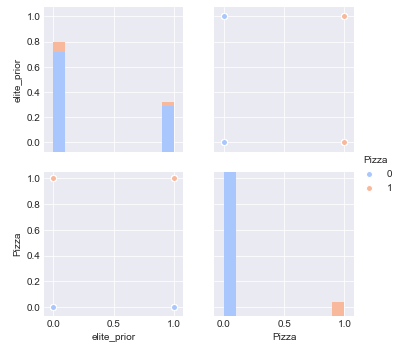

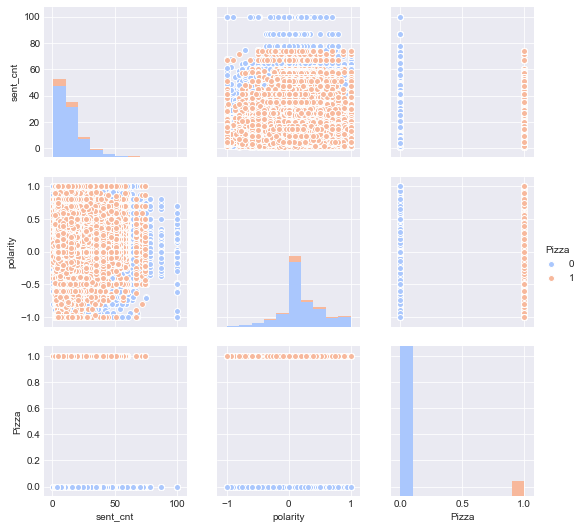

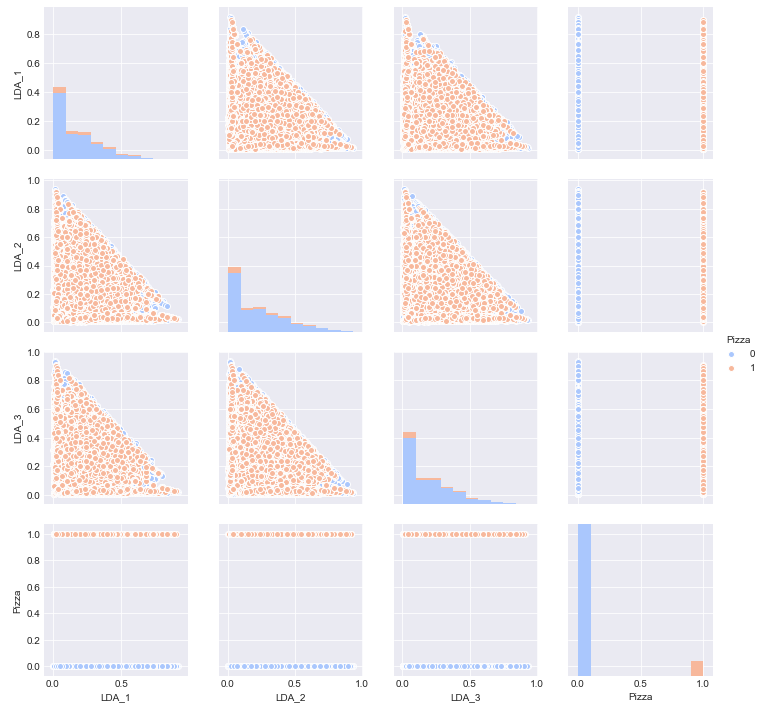

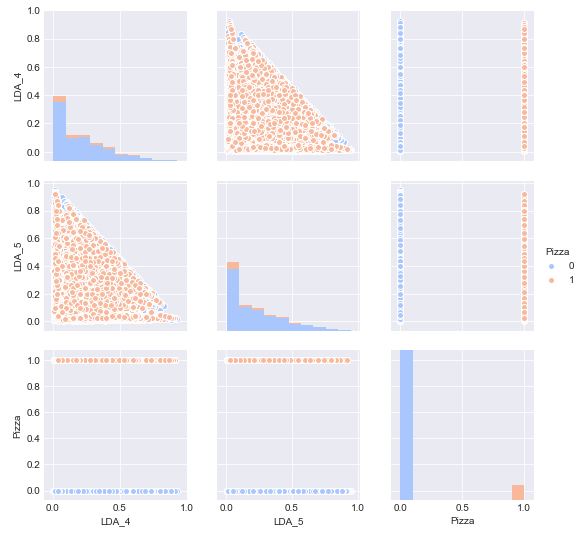

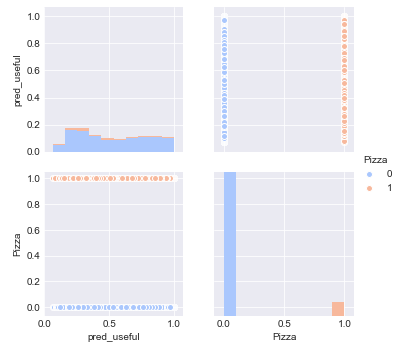

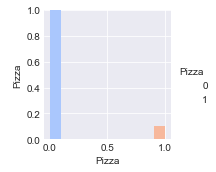

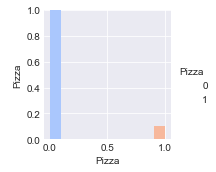

In [467]:
for i in range(27, 48, 3):
    sns.pairplot(review_LDA[review_LDA.columns.tolist()[i:i+3] + ['Pizza']], hue="Pizza", palette='coolwarm')

In [ ]:
for i in range(27, 48, 3):
    sns.pairplot(review_LDA[review_LDA.columns.tolist()[i:i+3] + ['city']], hue="city", palette='coolwarm')

#### Sentiment Analysis

In [ ]:
reviews_vect_df['polarity'] = reviews_vect_df['review_txt'].apply(lambda text: TextBlob(text).sentiment[0])
reviews_vect_df['subjectivity'] = reviews_vect_df['review_txt'].apply(lambda text: TextBlob(text).sentiment[1])

#TextBlob(reviews_vect_df.iloc[0]['review_txt']).sentiment

In [ ]:
TextBlob(reviews_vect_df.iloc[0]['review_txt']).sentiment

In [ ]:
pd.set_option('display.max_columns', 500)
reviews_vect_df.head()